In [55]:
# What is the breakdown of experience levels across all data jobs?
## how is this change over time?
# what experience level will provide the best salary (on average)
# what are the top ten data jobs based on number of job_titles for by experience_level? 
##what are the statistical breakdowns for those?

In [56]:

# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pygwalker as pyg
import matplotlib.ticker as mtick


In [57]:
# Loaded variable 'df' from URI: c:\Users\kskorna\Projects\Global_Data_Jobs-main\clean.csv
# read_in clean csv
# added a comment
df = pd.read_csv(r'c:\Users\kskorna\Projects\Global_Data_Jobs-main\clean.csv')
df_global_data_jobs_clean_data = df
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
1,2024,Entry-level,Full-time,Data Reporting Analyst,58000,USD,58000,United States,In-person,United States,M
2,2024,Entry-level,Full-time,Data Reporting Analyst,42000,USD,42000,United States,In-person,United States,M
3,2024,Senior,Full-time,Data Manager,169680,USD,169680,United States,Remote,United States,M
4,2024,Senior,Full-time,Data Manager,113120,USD,113120,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21297,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L
21298,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
21299,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
21300,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S


In [68]:
df=df.drop(df[df.employee_residence=="Mexico"].index)

In [70]:
#check to confirm null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21283 entries, 0 to 21301
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           21283 non-null  datetime64[ns]
 1   experience_level    21283 non-null  object        
 2   employment_type     21283 non-null  object        
 3   job_title           21283 non-null  object        
 4   salary              21283 non-null  int64         
 5   salary_currency     21283 non-null  object        
 6   salary_in_usd       21283 non-null  int64         
 7   employee_residence  21283 non-null  object        
 8   work_setting        21283 non-null  object        
 9   company_location    21283 non-null  object        
 10  company_size        21283 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.9+ MB


In [59]:
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')
print(df.dtypes)

work_year             datetime64[ns]
experience_level              object
employment_type               object
job_title                     object
salary                         int64
salary_currency               object
salary_in_usd                  int64
employee_residence            object
work_setting                  object
company_location              object
company_size                  object
dtype: object


In [75]:
# Sort the DataFrame by 'salary' column in descending order
df_sorted = df.sort_values(by='salary_in_usd', ascending=False)

# Select the top row (highest-paid employee)
highest_paid_employee = df_sorted.head(4)

# Extract the subset with 'salary', 'job_title', and 'experience_level' for the highest-paid employee
df_subset_highest_paid = highest_paid_employee[['salary_in_usd', 'job_title', 'experience_level']]

# Display the subset DataFrame
print(df_subset_highest_paid)

      salary_in_usd       job_title experience_level
8379         750000  Data Scientist           Senior
6747         750000    Data Analyst           Senior
8300         750000   Data Engineer        Mid-level
6249         720000  Data Scientist           Senior
1326         720000   Data Engineer           Senior


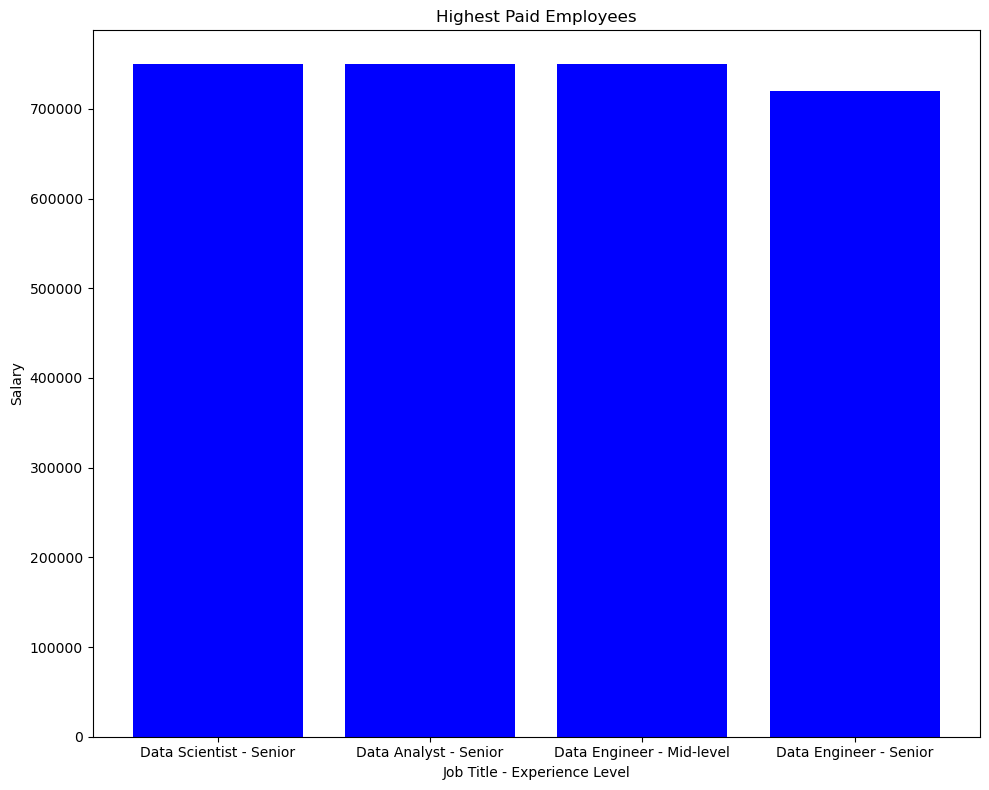

In [83]:
# Data for the highest-paid employees

# Data for the highest-paid employees with salaries in currency format
data = {
    'salary': [750000, 750000, 750000, 720000],
    'job_title': ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Data Engineer'],
    'experience_level': ['Senior', 'Senior', 'Mid-level', 'Senior']
}

# Create a DataFrame from the data
df_highest_paid = pd.DataFrame(data)

# Format salary as currency

# Create a DataFrame from the data
#df_highest_paid['salary'] = df_highest_paid['salary'].map('${:,.2f}'.format)


# Plotting the data
plt.figure(figsize=(10, 8))
plt.bar(df_highest_paid['job_title'] + ' - ' + df_highest_paid['experience_level'], df_highest_paid['salary'], color='blue')
plt.xlabel('Job Title - Experience Level')
plt.ylabel('Salary')
plt.title('Highest Paid Employees')
plt.xticks(rotation=(0))
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
df_subset = df[['salary','job_title', "experience_level"]]
print(df_subset).head(5)

       salary                 job_title experience_level
0       20000              Data Analyst      Entry-level
1       58000    Data Reporting Analyst      Entry-level
2       42000    Data Reporting Analyst      Entry-level
3      169680              Data Manager           Senior
4      113120              Data Manager           Senior
...       ...                       ...              ...
21297  165000           Data Specialist           Senior
21298  412000            Data Scientist           Senior
21299  151000  Principal Data Scientist        Mid-level
21300  105000            Data Scientist      Entry-level
21301  100000     Business Data Analyst      Entry-level

[21283 rows x 3 columns]


AttributeError: 'NoneType' object has no attribute 'head'

In [85]:
# sorting down to 3 columns

df_subset = df[['experience_level', 'work_year', 'job_title']]
print(df_subset)

      experience_level  work_year                 job_title
0          Entry-level 2024-01-01              Data Analyst
1          Entry-level 2024-01-01    Data Reporting Analyst
2          Entry-level 2024-01-01    Data Reporting Analyst
3               Senior 2024-01-01              Data Manager
4               Senior 2024-01-01              Data Manager
...                ...        ...                       ...
21297           Senior 2021-01-01           Data Specialist
21298           Senior 2020-01-01            Data Scientist
21299        Mid-level 2021-01-01  Principal Data Scientist
21300      Entry-level 2020-01-01            Data Scientist
21301      Entry-level 2020-01-01     Business Data Analyst

[21283 rows x 3 columns]


In [86]:
# sorted experience levels per job title  

df_subset['job_title'].value_counts().head(4)



job_title
Data Scientist    7135
Data Engineer     6678
Data Analyst      4503
Data Architect     768
Name: count, dtype: int64

In [87]:
top_four_job_titles = df_subset['job_title'].value_counts().head(4)
top_four_job_titles_df = top_four_job_titles.reset_index()
top_four_job_titles_df.columns = ['job_title', 'count']
top_four_job_titles_df

,job_title,count
0,Data Scientist,7135
1,Data Engineer,6678
2,Data Analyst,4503
3,Data Architect,768


In [88]:
df.groupby(['job_title', 'experience_level', 'work_year']).size().reset_index(name='count').head(4)

,job_title,experience_level,work_year,count
0,AI Data Scientist,Entry-level,2024-01-01,1
1,AWS Data Architect,Mid-level,2023-01-01,2
2,Admin & Data Analyst,Entry-level,2023-01-01,1
3,Admin & Data Analyst,Entry-level,2024-01-01,1


In [89]:
df.groupby(['job_title', 'experience_level', 'work_year']).size().reset_index(name='count')


,job_title,experience_level,work_year,count
0,AI Data Scientist,Entry-level,2024-01-01,1
1,AWS Data Architect,Mid-level,2023-01-01,2
2,Admin & Data Analyst,Entry-level,2023-01-01,1
3,Admin & Data Analyst,Entry-level,2024-01-01,1
4,Admin & Data Analyst,Mid-level,2024-01-01,2
...,...,...,...,...
382,Staff Data Analyst,Entry-level,2020-01-01,2
383,Staff Data Analyst,Executive,2020-01-01,2
384,Staff Data Analyst,Mid-level,2023-01-01,2
385,Staff Data Scientist,Senior,2020-01-01,2


In [90]:
top_four_job_titles = df_subset['job_title'].value_counts().nlargest(4).index.tolist()
grouped_data = df.groupby(['job_title', 'experience_level', "work_year"]).size().reset_index(name='count')
grouped_data


,job_title,experience_level,work_year,count
0,AI Data Scientist,Entry-level,2024-01-01,1
1,AWS Data Architect,Mid-level,2023-01-01,2
2,Admin & Data Analyst,Entry-level,2023-01-01,1
3,Admin & Data Analyst,Entry-level,2024-01-01,1
4,Admin & Data Analyst,Mid-level,2024-01-01,2
...,...,...,...,...
382,Staff Data Analyst,Entry-level,2020-01-01,2
383,Staff Data Analyst,Executive,2020-01-01,2
384,Staff Data Analyst,Mid-level,2023-01-01,2
385,Staff Data Scientist,Senior,2020-01-01,2


In [91]:
grouped_data = df.groupby(['job_title', 'experience_level']).size().reset_index(name='count')
grouped_data

,job_title,experience_level,count
0,AI Data Scientist,Entry-level,1
1,AWS Data Architect,Mid-level,2
2,Admin & Data Analyst,Entry-level,2
3,Admin & Data Analyst,Mid-level,2
4,Admin & Data Analyst,Senior,1
...,...,...,...
205,Software Data Engineer,Senior,4
206,Staff Data Analyst,Entry-level,2
207,Staff Data Analyst,Executive,2
208,Staff Data Analyst,Mid-level,2


In [92]:
top_four_job_titles = df_subset['job_title'].value_counts().nlargest(4).index.tolist()

# Filter the DataFrame to include only the top 4 job titles
subset_filtered = df_subset.loc[df_subset["job_title"].isin(top_four_job_titles)]

# Group by both "job_title" and "experience_level" columns
grouped_data = subset_filtered.groupby(["job_title", "experience_level", "work_year"]).size()
#Break down experience_level with in job title, per year
# Display the grouped data
print(grouped_data)

job_title       experience_level  work_year 
Data Analyst    Entry-level       2020-01-01       8
                                  2021-01-01      12
                                  2022-01-01      34
                                  2023-01-01     252
                                  2024-01-01     636
                                                ... 
Data Scientist  Senior            2020-01-01       9
                                  2021-01-01      23
                                  2022-01-01     624
                                  2023-01-01    2708
                                  2024-01-01    1573
Length: 65, dtype: int64


In [93]:
df_top_3 = df[df['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst'])]
df_top_3['work_year'] = pd.to_datetime(df_top_3['work_year']).dt.year
df_top_3


C:\Users\kskorna\AppData\Local\Temp\ipykernel_43296\2276859299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3['work_year'] = pd.to_datetime(df_top_3['work_year']).dt.year


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
5,2024,Mid-level,Full-time,Data Scientist,235400,USD,235400,United States,In-person,United States,M
6,2024,Mid-level,Full-time,Data Scientist,209720,USD,209720,United States,In-person,United States,M
7,2024,Mid-level,Full-time,Data Scientist,235400,USD,235400,United States,Remote,United States,M
8,2024,Mid-level,Full-time,Data Scientist,209720,USD,209720,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21293,2020,Mid-level,Full-time,Data Engineer,130800,USD,130800,Spain,Remote,United States,M
21295,2021,Mid-level,Full-time,Data Scientist,160000,SGD,119059,Singapore,Remote,Israel,M
21296,2021,Mid-level,Full-time,Data Engineer,24000,EUR,28369,Malta,Hybrid,Malta,L
21298,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L


<Axes: xlabel='job_title,experience_level'>

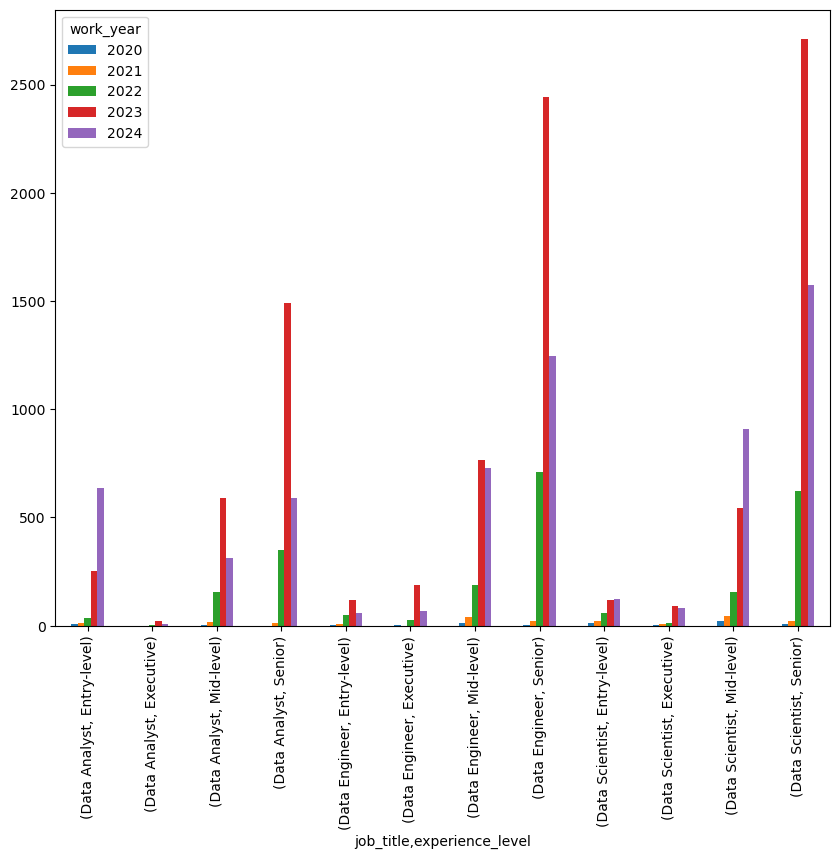

In [ ]:
groupby_df = df_top_3.groupby(['work_year','experience_level','job_title']).size().reset_index(name= 'count')
pivoted_df = groupby_df.pivot_table(index='work_year', columns= ['job_title','experience_level'], values = 'count')

pivoted_df.T.plot(kind='bar', figsize=(10, 8))

In [1]:
def group_by_experience_level(df_grouped_data):
    return df_grouped_data.groupby(['grouped_data', 'experience_level'])
